# Proposal

## Title: 

### Introduction

Data science and STEM careers are growing in popularity as more businesses leverage technological advances to solve challenges and streamline operations. Among them, students who are waiting for employment or employees who want to change careers are very curious about what can be the mean factors that impact the tracjectory of salaries and bonuses among the top 5 companies counts from our data. The purpose of the experiment was to determine which combination of three predictors out of four predictors "years at work," "gender," "base salary," and "bonus" most accurately predicted a person's career in STEM and data science In order to provide application suggestions for job seekers with different work experience and salary expectations. This is to suggest that the job seekers can be more insightful and intentional with their development and career path. The dataset we will be working with is the "Data Science and STEM Salary" dataset from Kaggle, which contains information on numerous job titles and other criteria, and has 62,000 salary records from the leading organizations for this project. 

### Preliminary exploratory data analysis

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

The data we are going to use for this project is about **Data Science and STEM Salaries** taken from **Kaggle**, with the link https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries
- Firstly, we download the data `Levels_Fyi_Salary_Data.csv` from the link above. We can see the columns available for wrangling, the detail and brief explanation for each columns. These explanation will be important for dropping trivial columns for our analysis later on.
- Next, we upload our data to the Jupyter Notebook in the 'data' folder.
- After that, we opened the `Levels_Fyi_Salary_Data.csv` to check that the data inside is in a comma-separated file format, with no header or additional information that might hinder the reading process.
- Finally, we read the data using `read_csv` and assign it to a variable named `salary_data`, as follows.

The dataset above contains columns as follows:
- `timestamp`, the time when the data is recorded
- `company`, the company where each worker is at
- `level`, the level the obsevation is at
- `title`, the role title of the worker
- `totalyearlycompensation`, the total paycheck the worker receive for a year
- `location`, the location of the company
- `yearsofexperience`, the total working years experience a worker have
- `yearsatcompany`, the total years a worker have been working in said company
- `tag`, the job tag (subtitle) of the worker
- `basesalary`, the base salary of the worker
- `stockgrantvalue`, the stock a worker receive as compensation
- `bonus`, the bonus a worker receive
- `gender`, the gender of the worker
- `otherdetails`, other details of the worker
- `dmaid`, identification number of designated market area of the worker
- `rowNumber`, row number of the data
- `Masters_Degree`, `Bachelors_Degree`, `Doctorate_Degree`, `Highschool`, `Some_College`, and `Education` is the last education of the worker
- `Race_Asian`, `Race_White`, `Race_Hispanic`, `Race_Black`, `Race_Two_Or_More`, and `Race` is the race of the worker

In [2]:
salary_data <- read_csv("data/Levels_Fyi_Salary_Data.csv")
salary_data

Rows: 62642 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): timestamp, company, level, title, location, tag, gender, otherdeta...
dbl (19): totalyearlycompensation, yearsofexperience, yearsatcompany, basesa...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,⋯,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NA,107000,⋯,0,0,0,0,0,0,0,0,NA,NA
6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NA,0,⋯,0,0,0,0,0,0,0,0,NA,NA
6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NA,155000,⋯,0,0,0,0,0,0,0,0,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14,12,Full Stack,157000,⋯,0,0,0,0,0,0,0,0,NA,NA
9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8,4,iOS,194688,⋯,0,0,0,0,0,0,0,0,NA,NA
1/29/2019 5:12:59,apple,ict3,Software Engineer,200000,"Sunnyvale, CA",0,0,ML / AI,155000,⋯,0,0,0,0,0,0,0,0,NA,NA


In [3]:
race_summary <- salary_data |> group_by(Race) |> summarize(count= n())
#race_summary
same_race_checker <- function(race1, race2) {
  if (race1 == race2) {
      return(1)
  } else {
      return(0)
  }
}

salary_data_with_race_mutated <- salary_data |> filter(!is.na(Race)) |> 
filter(Race == "Hispanic") |> 
mutate(asian_race = same_race_checker(Race, "Asian"))
#salary_data_with_race_mutated

US_appender <- function(locationString) {
  country <- unlist(strsplit(locationString, ",\\s*"))[3]
  if (country == "") {
    return("US")
  } else {
    return(country)
  }
}

salary_data_with_country <- salary_data |>
mutate(country = US_appender(location))
#salary_data_with_country

timestamp_year_extractor <- function(timeString) {
  date <- as.Date(timeString, format = "%m/%d/%Y")
  year <- format(date, "%Y")
  return(year)
}

salary_data_with_country_with_year <- salary_data_with_country |>
mutate(year = timestamp_year_extractor(timestamp))
#salary_data_with_country_with_year

Warning message in if (race1 == race2) {:
“the condition has length > 1 and only the first element will be used”


In [4]:
peek_country <- unique(salary_data_with_country_with_year$country)
#peek_country
peek_tag <- unique(salary_data$tag)
#peek_tag
peek_title <- unique(salary_data$title)
#peek_title
peek_education <- unique(salary_data$Education)
#peek_education
peek_gender <- unique(salary_data$gender)
#peek_gender

Here, we see that the data is not yet in tidy format:
- There are useless columns, such as `dmaid` and `rowNumber` which is hard to be interpreted
- There are hard-to-use columns, such as `level` and `otherdetails` which might be affecting our predictive question, but is full with syntax problems
- There are a lot of duplicated details in each observation. For example, `Education` and `Race` alone is sufficient in telling the information of race and education of the workers
- There are a lot of missing values which can affect our classification process in the next stage

Hence, here are several things we need to sort out:
- First, we select useful columns that we want to use: `company` for what we want to predict, and the predictors: `yearsofexperience`, `totalyearlycompensation`, `gender`, `roletitle`, `year`, `Race`, and `Education`
- Then, we give filter missing values `NA` of each predictors
- After that, we convert the gender column into binary, 1 for male and 0 for female

In [12]:
top_5_company_count <- salary_data |> group_by(company) |> summarize(count=n()) |> arrange(desc(count)) |> head(5)
top_5_company_count

company,count
<chr>,<int>
Amazon,8126
Microsoft,5216
Google,4330
Facebook,2990
Apple,2028


In [16]:
tidy_salary_data <- salary_data |> mutate(year = timestamp_year_extractor(timestamp)) |>
select(company, yearsofexperience, totalyearlycompensation, gender, title, year, Race, Education) |>
filter(!is.na(gender) & !is.na(Race) & !is.na(Education)) |>
filter(company == "Amazon" |company == "Microsoft"|company == "Google"|company == "Facebook"|company == "Apple") |>
filter(gender == "Male" | gender == "Female") |>
group_by(company) |> 
mutate(data_count=n()) |> 
arrange(desc(data_count)) 

tidy_salary_data$gender[tidy_salary_data$gender == "Male"] <- "1"
tidy_salary_data$gender[tidy_salary_data$gender == "Female"] <- "0"
tidy_salary_data$gender <- as.numeric(tidy_salary_data$gender) 
tidy_salary_data

company,yearsofexperience,totalyearlycompensation,gender,title,year,Race,Education,data_count
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
Amazon,15,310000,1,Software Engineer,2020,Asian,Bachelor's Degree,2576
Amazon,19,620000,1,Software Engineering Manager,2020,Asian,Bachelor's Degree,2576
Amazon,4,210000,1,Software Engineer,2020,Hispanic,Highschool,2576
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Apple,12,133000,1,Hardware Engineer,2021,Asian,Master's Degree,599
Apple,7,53000,1,Software Engineer,2021,Asian,Bachelor's Degree,599
Apple,20,365000,1,Software Engineer,2021,White,Bachelor's Degree,599


Thirdly, the obtained tidy_data is divided into training data and testing data 75% to 25%, respectively for training and testing the variable we will predict: company.  

In [17]:
data_split <- initial_split(tidy_salary_data, prop = 0.75, strata = company)  
data_train <- training(data_split)   
data_test <- testing(data_split)
data_train
data_test

company,yearsofexperience,totalyearlycompensation,gender,title,year,Race,Education,data_count
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
Amazon,19,620000,1,Software Engineering Manager,2020,Asian,Bachelor's Degree,2576
Amazon,0,142000,1,Software Engineer,2020,Asian,Master's Degree,2576
Amazon,3,50000,1,Software Engineer,2020,Asian,Bachelor's Degree,2576
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Apple,0,158000,1,Hardware Engineer,2021,Asian,Master's Degree,599
Apple,12,133000,1,Hardware Engineer,2021,Asian,Master's Degree,599
Apple,7,53000,1,Software Engineer,2021,Asian,Bachelor's Degree,599


company,yearsofexperience,totalyearlycompensation,gender,title,year,Race,Education,data_count
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
Amazon,15,310000,1,Software Engineer,2020,Asian,Bachelor's Degree,2576
Amazon,4,210000,1,Software Engineer,2020,Hispanic,Highschool,2576
Amazon,9,200000,1,Software Engineer,2020,Asian,Master's Degree,2576
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Apple,20,189000,1,Software Engineer,2021,White,Bachelor's Degree,599
Apple,18,440000,1,Hardware Engineer,2021,Asian,Bachelor's Degree,599
Apple,20,365000,1,Software Engineer,2021,White,Bachelor's Degree,599


After getting the training data, we counted the average total yearly compensation of each company, and sorted it in descending order.  
As for gender, we analyzed the changing trend of total yearly compensation of employees of different genders when their work experience changes.  
And the distribution education is represented by a bar graph.

In [18]:
mean_table <- aggregate(data_train$totalyearlycompensation, by = list(type = data_train$company),mean)
names(mean_table) <- c("company","mean_totalyearlycompensation")
arrange(mean_table,desc(mean_totalyearlycompensation))

company,mean_totalyearlycompensation
<chr>,<dbl>
Facebook,333165.1
Apple,273188.8
Google,272125.6
Amazon,218583.0
Microsoft,196887.0


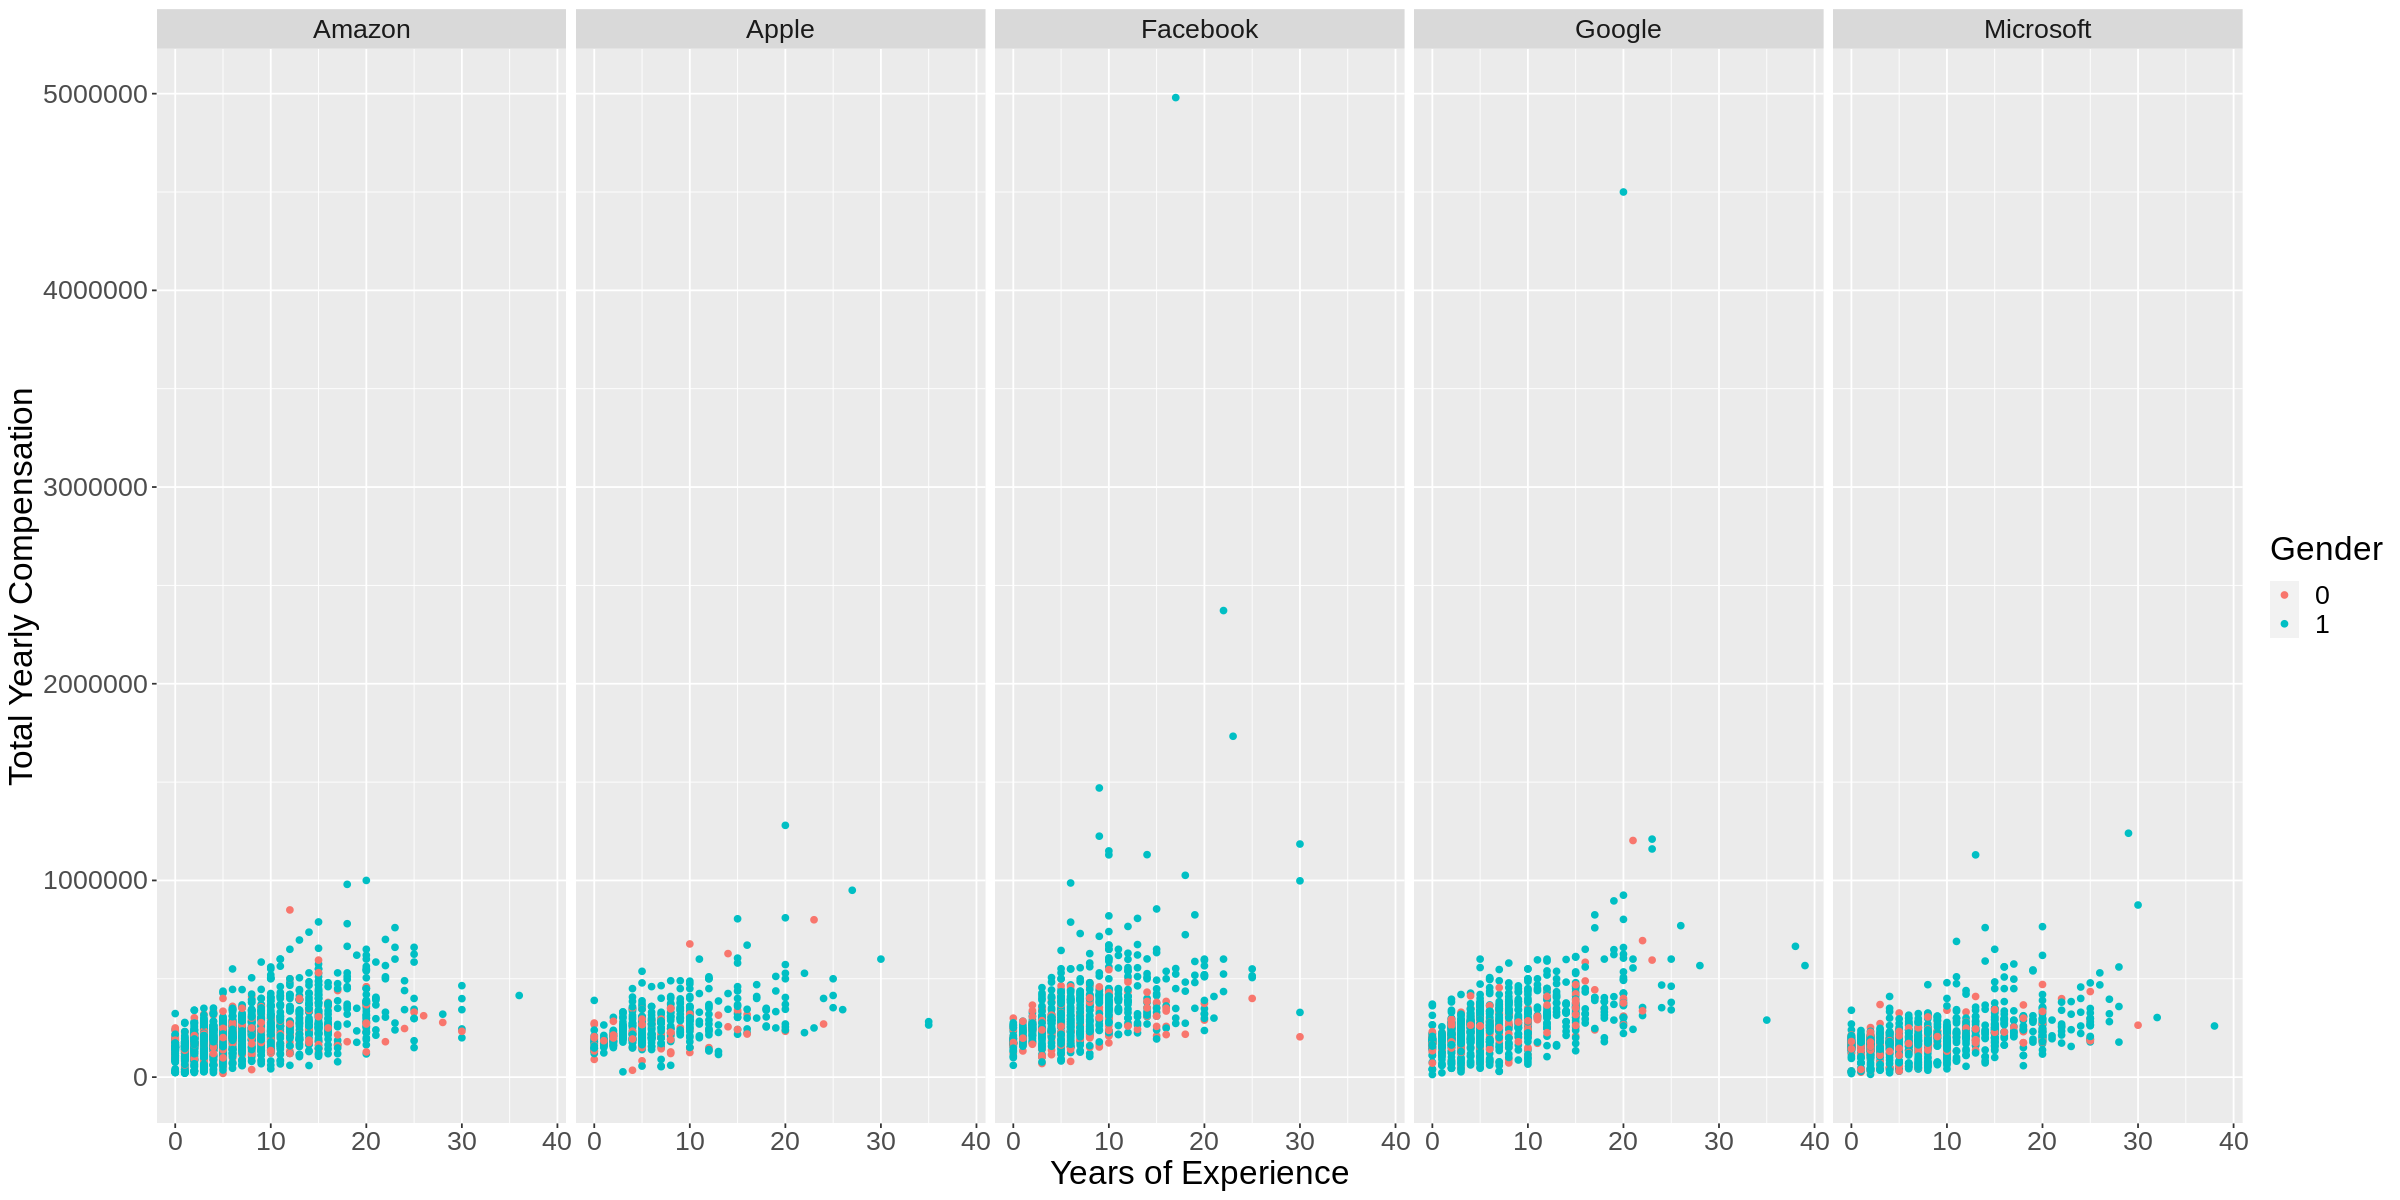

In [24]:
options(repr.plot.width = 20, repr.plot.height = 10)
options(scipen = 10)
salary_gender <- data_train |>
    ggplot(aes(x = yearsofexperience, y = totalyearlycompensation)) + 
        geom_point(aes(colour = as_factor(gender))) +
        labs(x = "Years of Experience", y = "Total Yearly Compensation", colour = "Gender") + 
        facet_grid(cols = vars(company))+
        theme(text = element_text(size=20))
salary_gender

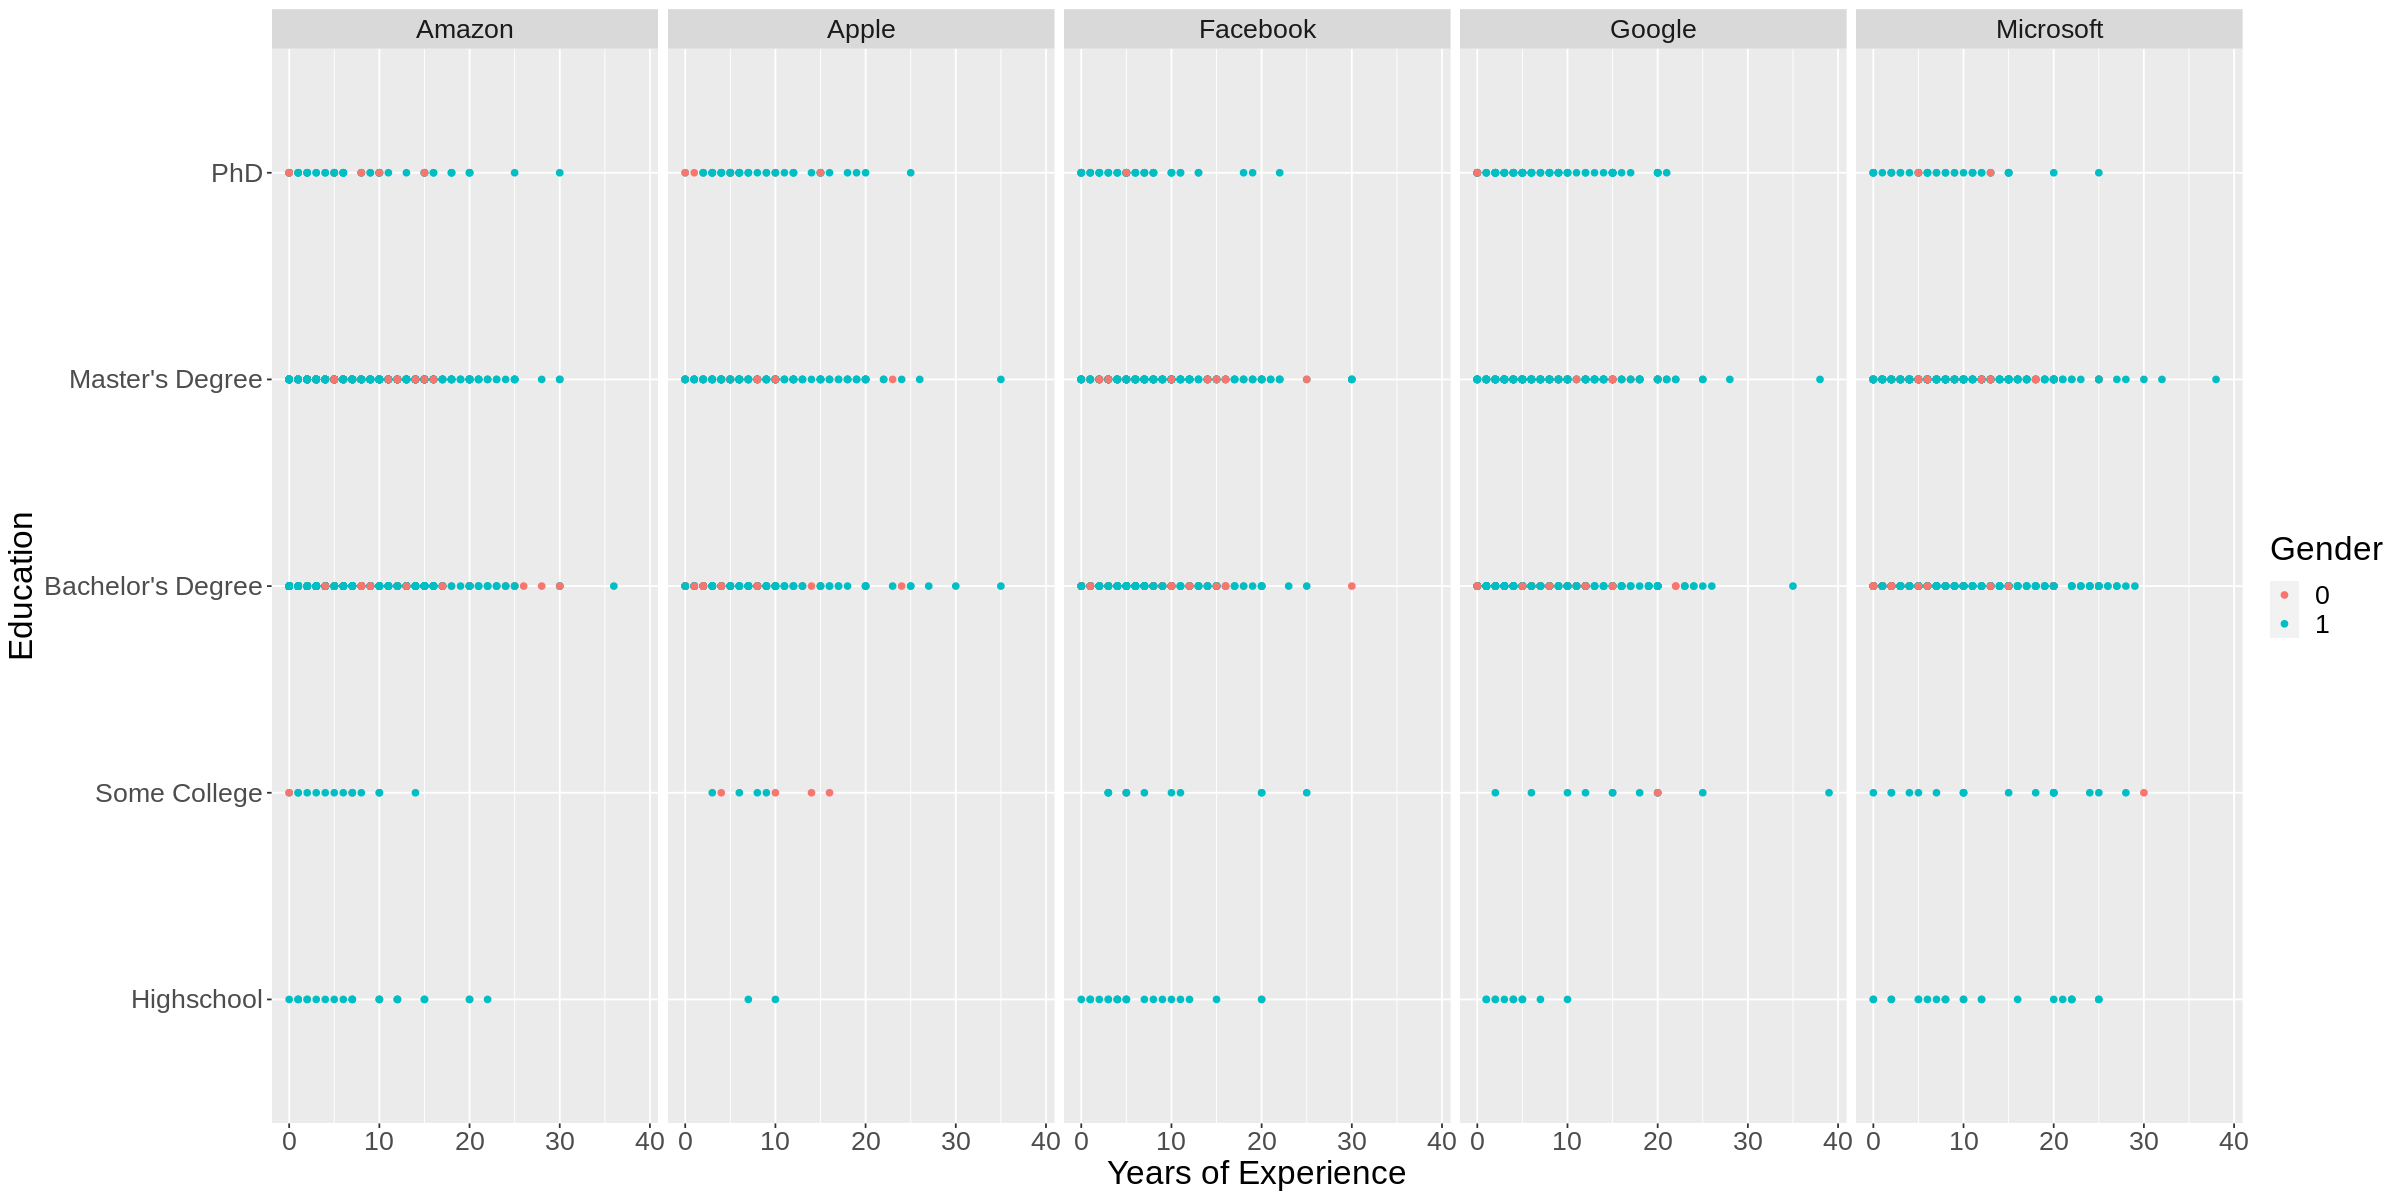

In [30]:
options(repr.plot.width = 20, repr.plot.height = 10)
options(scipen = 10)
bonus_gender <- data_train |>
    mutate(Education = factor(Education, level = c("Highschool", "Some College", "Bachelor's Degree", "Master's Degree", "PhD"))) |>
    ggplot(aes(x = yearsofexperience, y = Education)) + 
        geom_point(aes(colour = as_factor(gender))) +
        labs(x = "Years of Experience", y = "Education", colour = "Gender") + 
        facet_grid(cols = vars(company))+
        theme(text = element_text(size=20))
bonus_gender

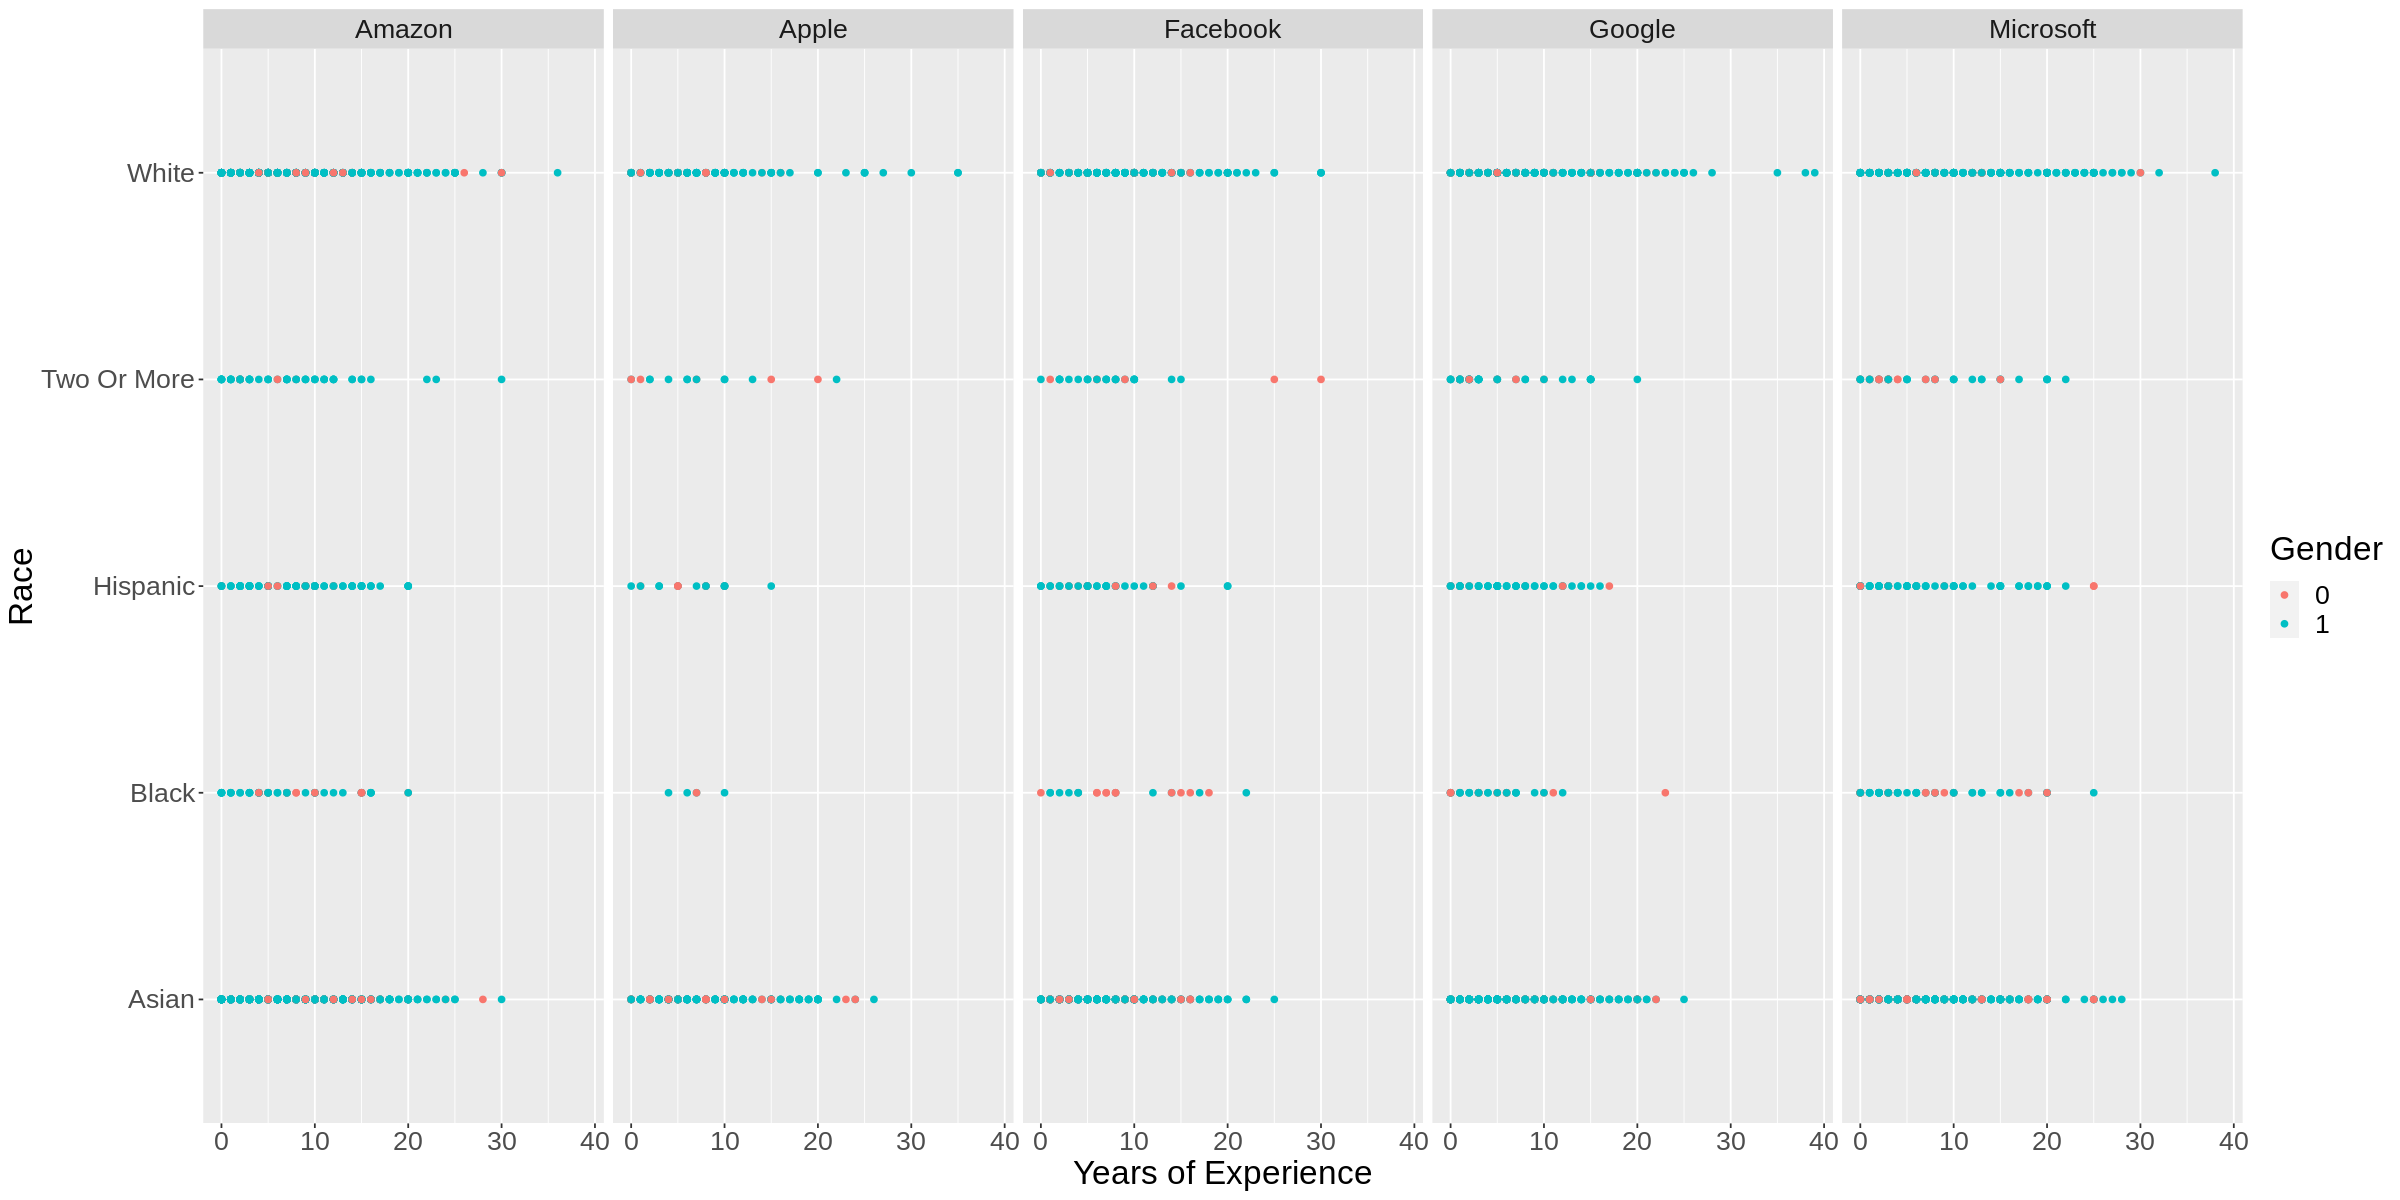

In [31]:
options(repr.plot.width = 20, repr.plot.height = 10)
options(scipen = 10)
bonus_gender <- data_train |>
    ggplot(aes(x = yearsofexperience, y = Race)) + 
        geom_point(aes(colour = as_factor(gender))) +
        labs(x = "Years of Experience", y = "Race", colour = "Gender") + 
        facet_grid(cols = vars(company))+
        theme(text = element_text(size=20))
bonus_gender

### Method

Work experience, gender, base salary, and bonus are the quantitative variables that we will use to predict the categorical variable company. At the end of the second part we have split the data into training and testing sets. The training set is used to create recipes and fit models, while the test set is used to predict outcomes and determine accuracy and workflow analysis. Then we will make various combinations of the four predictors as a combination of three or two predictors to predict the company name, so a total of 4 or 6 predictions are required. We will visualize the prediction results and accuracy vs k for each predictor combination to better compare prediction performance and accuracy.



### Expected outcomes and significance
- What do you expect to find?
In this project, we expect to find the most relevant predictors that can affect the company you join. This can vary based on years of experience, gender, and expected salary.
- What impact could such findings have?
The impact is impactful to the job market and the trajectory of the career path for the people who are currently searching for jobs and people who are interested in learning more about their career development. Those perdictors can be something to consider, when they are researching for opportunities. 
- What future questions could this lead to?
As our dataset is not fully complete - some variables have high percentage of N/A, it will be helpful to refresh the survey in the near future to get more information. This can provide us with a clear understanding and stengthen the correlation of the variables. 